_05839: Interactive Data Science_
_Instructor: John Stamper_

_Final Project_

__Topic: Plastic Pollution__<br>
__Submitted by: mmalani__ <br>

_Data and information reference: https://ourworldindata.org/plastic-pollution_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast

sns.set()
%matplotlib inline

import chardet
sns.set(style="whitegrid", color_codes=True)

In [2]:
# COUNTRY 01 : Plastic waste per person 2010

file_Country_01 = "PlasticPollution\plastic-waste-per-capita.csv"
with open(file_Country_01, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_Country_01 = pd.read_csv(file_Country_01, encoding='ISO-8859-1')

# Updated file
df_Country01 = df_og_Country_01.copy(deep=True)
df_Country01

,Entity,Code,Year,Per capita plastic waste (kg/person/day)
0,Albania,ALB,2010,0.069
1,Algeria,DZA,2010,0.144
2,Angola,AGO,2010,0.062
3,Anguilla,AIA,2010,0.252
4,Antigua and Barbuda,ATG,2010,0.660
...,...,...,...,...
181,Uruguay,URY,2010,0.252
182,Vanuatu,VUT,2010,0.295
183,Venezuela,VEN,2010,0.252
184,Vietnam,VNM,2010,0.103


In [3]:
df_Country01 = df_Country01.dropna(how = "all")

# Checking no. of data columns
len(df_Country01)

186

In [4]:
df_Country01.dtypes.to_dict()

{'Entity': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Per capita plastic waste (kg/person/day)': dtype('float64')}

In [5]:
# Renaming columns
df_Country01 = df_Country01.rename(columns={'Entity': 'Country name'})
                               
df_Country01

,Country name,Code,Year,Per capita plastic waste (kg/person/day)
0,Albania,ALB,2010,0.069
1,Algeria,DZA,2010,0.144
2,Angola,AGO,2010,0.062
3,Anguilla,AIA,2010,0.252
4,Antigua and Barbuda,ATG,2010,0.660
...,...,...,...,...
181,Uruguay,URY,2010,0.252
182,Vanuatu,VUT,2010,0.295
183,Venezuela,VEN,2010,0.252
184,Vietnam,VNM,2010,0.103


In [6]:
df_Country01.sort_values(by=['Per capita plastic waste (kg/person/day)'], inplace=True, ascending=False)

[Text(0, 0.5, 'Country'), Text(0.5, 0, '(kg/person/day)')]

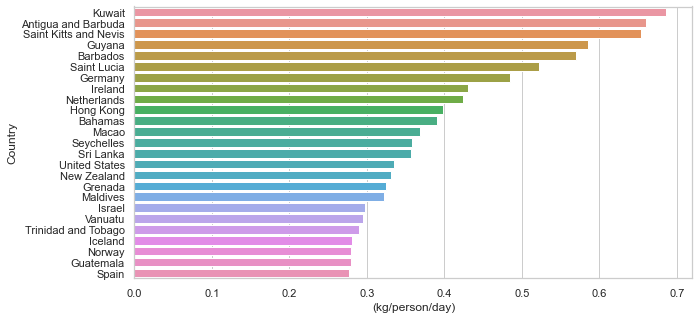

In [7]:
# Country 01 - Plot: Bar chart
df_Country01_top_n = df_Country01.head(n=25)
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_Country01_top_n, x="Per capita plastic waste (kg/person/day)", y="Country name")
ax.set(xlabel="(kg/person/day)", ylabel="Country")

__Country 01: Plastic waste per person__
<br>
<font color=Gray>
- Daily per capita plastic waste across the highest countries – Kuwait, Guyana, Germany, Netherlands, Ireland, 
the United States – is more than ten times higher than across many countries such as India, Tanzania, Mozambique 
and Bangladesh.<br>
- The figures represent total plastic waste generation and do not account for differences in waste management, recycling 
or incineration. They therefore do not represent quantities of plastic at risk of loss to the ocean or other waterways.
</font>

__----------------------------------------------__

In [8]:
# COUNTRY 02 : Total plastic waste by country

file_Country_02 = "PlasticPollution\plastic-waste-mismanaged.csv"
with open(file_Country_02, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_Country_02 = pd.read_csv(file_Country_02, encoding='ISO-8859-1')

# Updated file
df_Country02 = df_og_Country_02.copy(deep=True)
df_Country02

,Entity,Code,Year,Mismanaged plastic waste (metric tons year-1)
0,Africa,NaN,2019,13690104
1,Albania,ALB,2019,69833
2,Algeria,DZA,2019,764578
3,Angola,AGO,2019,236946
4,Antigua and Barbuda,ATG,2019,627
...,...,...,...,...
166,Vietnam,VNM,2019,1112790
167,Western Sahara,ESH,2019,4114
168,World,OWID_WRL,2019,61773700
169,Yemen,YEM,2019,291737


In [9]:
df_Country02 = df_Country02.dropna(how = "all")

# Checking no. of data columns
len(df_Country02)

171

In [10]:
df_Country02.dtypes.to_dict()

{'Entity': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Mismanaged plastic waste (metric tons year-1)': dtype('int64')}

In [11]:
# Renaming columns
df_Country02 = df_Country02.rename(columns={'Entity': 'Country name'})
                               
df_Country02

,Country name,Code,Year,Mismanaged plastic waste (metric tons year-1)
0,Africa,NaN,2019,13690104
1,Albania,ALB,2019,69833
2,Algeria,DZA,2019,764578
3,Angola,AGO,2019,236946
4,Antigua and Barbuda,ATG,2019,627
...,...,...,...,...
166,Vietnam,VNM,2019,1112790
167,Western Sahara,ESH,2019,4114
168,World,OWID_WRL,2019,61773700
169,Yemen,YEM,2019,291737


In [12]:
# Sorting data
df_Country02.sort_values(by=['Mismanaged plastic waste (metric tons year-1)'], inplace=True, ascending=False)

# Deleting world data
df_Country02 = df_Country02.drop(168, 0)

# Plotting only top 25 - descending order
df_Country02_top_n = df_Country02.head(n=25)

[Text(0, 0.5, 'Country'),
 Text(0.5, 0, 'Mismanaged plastic waste (metric tons year-1)')]

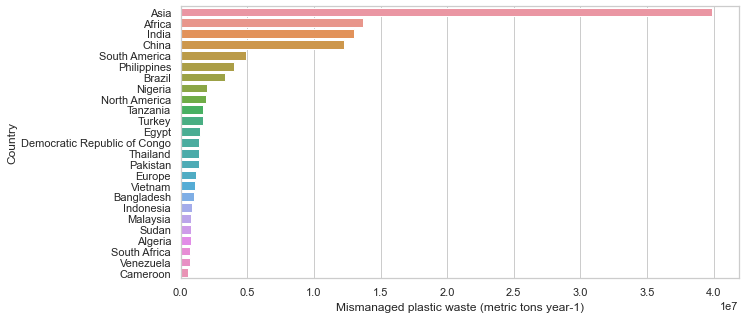

In [13]:
# Country 02 - Plot: Bar chart

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_Country02_top_n, x="Mismanaged plastic waste (metric tons year-1)", y="Country name")
ax.set(xlabel="Mismanaged plastic waste (metric tons year-1)", ylabel="Country")

__Country 02: Total plastic waste by country__
<br>
<font color=Gray>
- The largest population, China produced the largest quantity of plastic, at nearly 60 million tonnes. This was followed by the United States at 38 million, Germany at 14.5 million and Brazil at 12 million tonnes.<br>
- This estimate is available only for the year 2010, but as we see later in this entry, the relative global picture is similar in projections to 2025.
</font>

__----------------------------------------------__

In [14]:
# COUNTRY 03 : Share of plastic waste that is inadequately disposed 2010

file_Country_03 = "PlasticPollution\inadequately-managed-plastic.csv"
with open(file_Country_03, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_Country_03 = pd.read_csv(file_Country_03, encoding='ISO-8859-1')

# Updated file
df_Country03 = df_og_Country_03.copy(deep=True)
df_Country03

,Entity,Code,Year,Share of plastic inadequately managed
0,Albania,ALB,2010,45
1,Algeria,DZA,2010,58
2,Angola,AGO,2010,71
3,Anguilla,AIA,2010,2
4,Antigua and Barbuda,ATG,2010,6
...,...,...,...,...
181,Uruguay,URY,2010,8
182,Vanuatu,VUT,2010,81
183,Venezuela,VEN,2010,5
184,Vietnam,VNM,2010,86


In [15]:
df_Country03 = df_Country03.dropna(how = "all")

# Checking no. of data columns
len(df_Country03)

186

In [16]:
df_Country03.dtypes.to_dict()

{'Entity': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Share of plastic inadequately managed': dtype('int64')}

In [17]:
# Renaming columns
df_Country03 = df_Country03.rename(columns={'Entity': 'Country name',
                                            'Share of plastic inadequately managed':
                                            'Share of plastic inadequately managed (%)'})           
df_Country03

,Country name,Code,Year,Share of plastic inadequately managed (%)
0,Albania,ALB,2010,45
1,Algeria,DZA,2010,58
2,Angola,AGO,2010,71
3,Anguilla,AIA,2010,2
4,Antigua and Barbuda,ATG,2010,6
...,...,...,...,...
181,Uruguay,URY,2010,8
182,Vanuatu,VUT,2010,81
183,Venezuela,VEN,2010,5
184,Vietnam,VNM,2010,86


In [18]:
# Sorting data - Top 10
df_Country03.sort_values(by=['Share of plastic inadequately managed (%)'], inplace=True, ascending=False)

df_Country03_top_n = df_Country03.head(n=10)

[Text(0, 0.5, 'Country'), Text(0.5, 0, '(%)')]

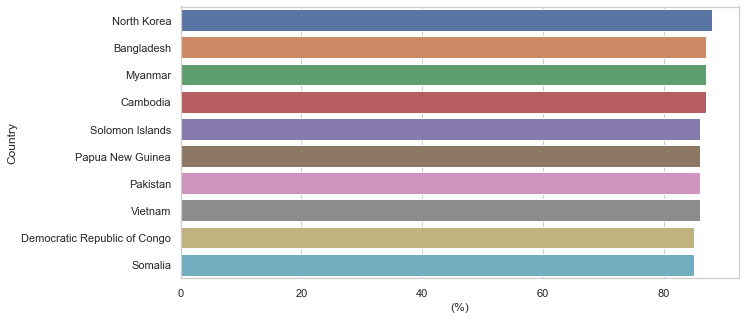

In [19]:
# Country 03 - Plot: Bar chart

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_Country03_top_n, x="Share of plastic inadequately managed (%)", y="Country name")
ax.set(xlabel="(%)", ylabel="Country")

[Text(0, 0.5, 'Country'), Text(0.5, 0, '(%)')]

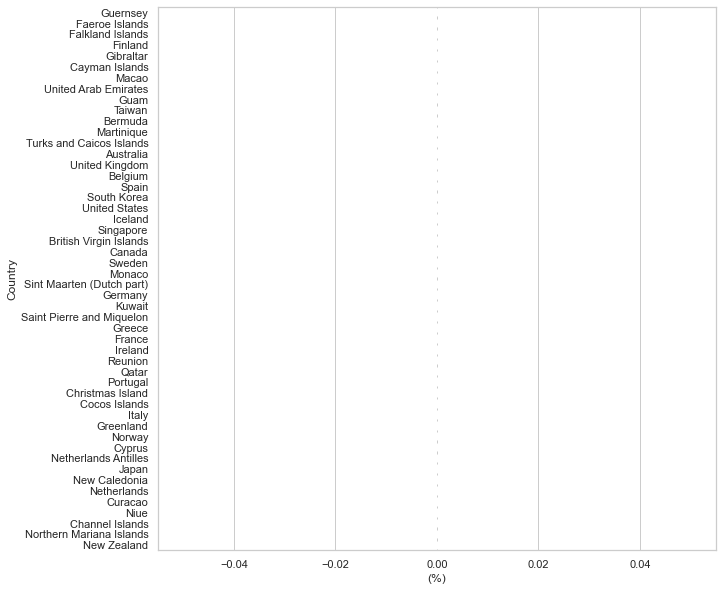

In [20]:
# Sorting data - Bottom 10
df_Country03.sort_values(by=['Share of plastic inadequately managed (%)'], inplace=True, ascending=True)

df_Country03_bottom_n = df_Country03.head(n=50)

# Country 03 - Plot: Bar chart

plt.figure(figsize=(10, 10))

ax = sns.barplot(data=df_Country03_bottom_n, x="Share of plastic inadequately managed (%)", y="Country name")
ax.set(xlabel="(%)", ylabel="Country")

__Country 03: Share of plastic waste that is inadequately disposed__
<br>
<font color=Gray>
- High-income countries, including most of Europe, North America, Australia, New Zealand, Japan and South Korea have very effective waste management infrastructure and systems.Across such countries almost no plastic waste is considered inadequately managed. Note this does not mean there is no plastic at risk of entering the natural environment <br>
- Across many low-to-middle-income income countries, inadequately disposed waste can be high; across many countries in South Asia and Sub-Saharan Africa, between 80-90 percent of plastic waste is inadequately disposed of</font>

__----------------------------------------------__

In [21]:
# COUNTRY 04 : Share of global total mismanaged plastic waste 2010

file_Country_04 = "PlasticPollution\mismanaged-waste-global-total.csv"
with open(file_Country_04, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_Country_04 = pd.read_csv(file_Country_04, encoding='ISO-8859-1')

# Updated file
df_Country04 = df_og_Country_04.copy(deep=True)
df_Country04

,Entity,Code,Year,Mismanaged waste (% global total)
0,Albania,ALB,2010,0.0933
1,Algeria,DZA,2010,1.6347
2,Angola,AGO,2010,0.1964
3,Anguilla,AIA,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.0039
...,...,...,...,...
181,Uruguay,URY,2010,0.0677
182,Vanuatu,VUT,2010,0.0706
183,Venezuela,VEN,2010,0.3214
184,Vietnam,VNM,2010,5.7588


In [22]:
df_Country04 = df_Country04.dropna(how = "all")

# Checking no. of data columns
len(df_Country04)

186

In [23]:
df_Country04.dtypes.to_dict()

{'Entity': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Mismanaged waste (% global total)': dtype('float64')}

In [24]:
# Renaming columns
df_Country04 = df_Country04.rename(columns={'Entity': 'Country name',
                                            'Mismanaged waste (% global total)':
                                            'Mismanaged (% global total)'})           
df_Country04

,Country name,Code,Year,Mismanaged (% global total)
0,Albania,ALB,2010,0.0933
1,Algeria,DZA,2010,1.6347
2,Angola,AGO,2010,0.1964
3,Anguilla,AIA,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.0039
...,...,...,...,...
181,Uruguay,URY,2010,0.0677
182,Vanuatu,VUT,2010,0.0706
183,Venezuela,VEN,2010,0.3214
184,Vietnam,VNM,2010,5.7588


In [25]:
# Sorting 
df_Country04.sort_values(by=['Mismanaged (% global total)'], inplace=True, ascending=False)
df_Country04_top_n = df_Country04.head(n=25)

[Text(0, 0.5, 'Country'), Text(0.5, 0, '(%)')]

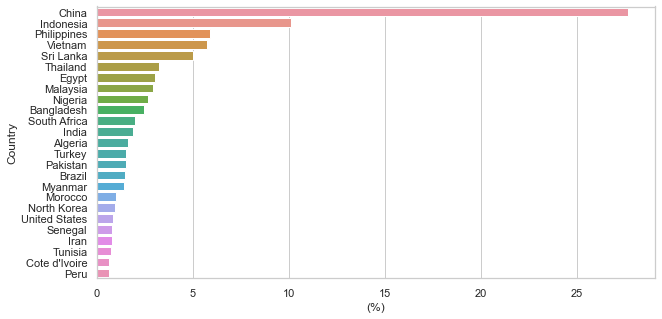

In [26]:
# Country 04 - Plot: Bar chart

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_Country04_top_n, x="Mismanaged (% global total)", y="Country name")
ax.set(xlabel="(%)", ylabel="Country")

__Country 04: Share of global total mismanaged plastic waste__
<br>
<font color=Gray>
- Whilst many countries across Europe and North America had high rates of per capita plastic generation, once corrected for waste management, their contribution to mismanaged waste at risk of ocean pollution is significantly lower.<br>
- China contributes the highest share of mismanaged plastic waste with around 28 percent of the global total, followed by 10 percent in Indonesia, 6 percent for both the Philippines and Vietnam.
- If North America & Europe were to completely eliminate plastic use, global mismanaged plastic would decline by less than 5 percent.
</font>

__----------------------------------------------__

In [27]:
# COUNTRY 05 : Mismanaged plastic waste per capita, 2019

file_Country_05 = "PlasticPollution\mismanaged-plastic-waste-per-capita.csv"
with open(file_Country_05, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_Country_05 = pd.read_csv(file_Country_05, encoding='ISO-8859-1')

# Updated file
df_Country05 = df_og_Country_05.copy(deep=True)
df_Country05

,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year)
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918
...,...,...,...,...
160,Vietnam,VNM,2019,11.536045
161,Western Sahara,ESH,2019,7.068729
162,World,OWID_WRL,2019,8.008551
163,Yemen,YEM,2019,10.004012


In [28]:
# Drop regions that
df_Country05 = df_Country05.dropna(how = "any")

# Checking no. of data columns
len(df_Country05)

df_Country05

,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year)
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918
5,Argentina,ARG,2019,10.401912
...,...,...,...,...
160,Vietnam,VNM,2019,11.536045
161,Western Sahara,ESH,2019,7.068729
162,World,OWID_WRL,2019,8.008551
163,Yemen,YEM,2019,10.004012


In [29]:
# Renaming columns
df_Country05 = df_Country05.rename(columns={'Entity': 'Country name'})
                                           
df_Country05.dtypes.to_dict()

{'Country name': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Mismanaged plastic waste per capita (kg per year)': dtype('float64')}

[Text(0, 0.5, 'Country'), Text(0.5, 0, '(kg per year)')]

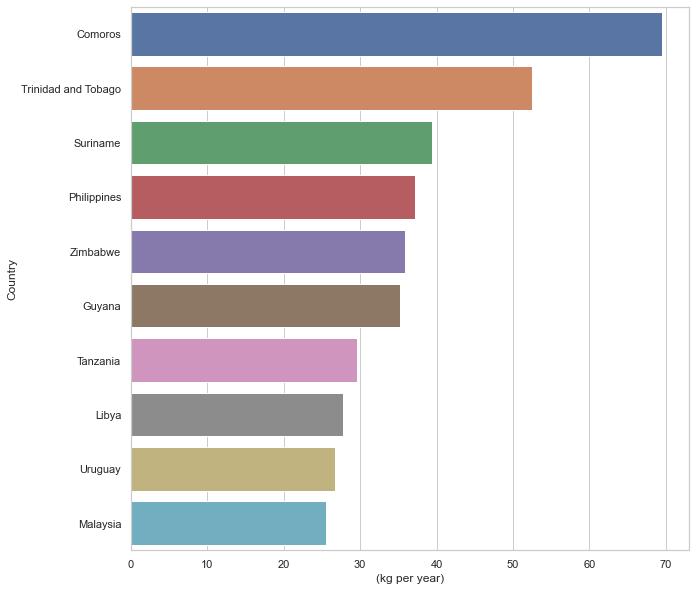

In [30]:
# Sorting 
df_Country05.sort_values(by=['Mismanaged plastic waste per capita (kg per year)'], 
                         inplace=True, ascending=False)
df_Country05_top_n = df_Country05.head(n=10)

# Country 05 - Plot: Bar chart
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=df_Country05_top_n, x="Mismanaged plastic waste per capita (kg per year)", 
                 y="Country name")
ax.set(xlabel="(kg per year)", ylabel="Country")

__Country 05: Mismanaged plastic waste per capita, 2019__
<br>

__----------------------------------------------__

Look at the __Future mismanaged plastic__

The data presented in the analysis above is for the year 2010; how is this global picture likely to change over time?

In [31]:
# COUNTRY 06 : Plastic exports to China by top 10 exporting countries, 2016

file_Country_06 = "PlasticPollution\plastic-exports-to-china.csv"
with open(file_Country_06, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_Country_06 = pd.read_csv(file_Country_06, encoding='ISO-8859-1')

# Updated file
df_Country06 = df_og_Country_06.copy(deep=True)
df_Country06

,Entity,Code,Year,Plastic exports to China (tonnes)
0,Australia,AUS,2016,293122
1,Belgium,BEL,2016,323308
2,Canada,CAN,2016,189161
3,Germany,DEU,2016,390106
4,Hong Kong,HKG,2016,1778898
5,Indonesia,IDN,2016,189273
6,Japan,JPN,2016,842104
7,Philippines,PHL,2016,320105
8,Thailand,THA,2016,431783
9,Top 10 countries,NaN,2016,5451304


In [32]:
# Data types                       
df_Country06.dtypes.to_dict()

{'Entity': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Plastic exports to China (tonnes)': dtype('int64')}

[Text(0, 0.5, 'Entity'), Text(0.5, 0, '(tonnes)')]

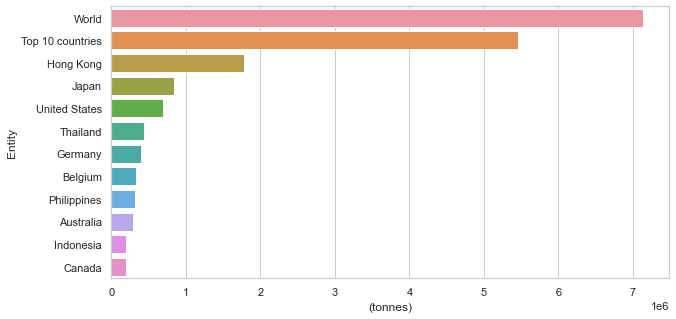

In [33]:
# Renaming columns
df_Country05 = df_Country05.rename(columns={'Entity': 'Country name'})

# Sorting 
df_Country06.sort_values(by=['Plastic exports to China (tonnes)'], 
                         inplace=True, ascending=False)

# Country 06 - Plot: Bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_Country06, x="Plastic exports to China (tonnes)", 
                 y="Entity")
ax.set(xlabel="(tonnes)", ylabel="Entity")

__Country 06: Plastic exports to China by top 10 exporting countries, 2016__
<br>

__----------------------------------------------__

In [34]:
# COUNTRY 07 : Plastic waste emitted to the ocean, 2019

file_Country_07 = "PlasticPollution\plastic-waste-emitted-to-the-ocean.csv"
with open(file_Country_07, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_Country_07 = pd.read_csv(file_Country_07, encoding='ISO-8859-1')

# Updated file
df_Country07 = df_og_Country_07.copy(deep=True)
df_Country07

,Entity,Code,Year,Mismanaged waste emitted to the ocean (metric tons year-1)
0,Africa,NaN,2019,78252
1,Albania,ALB,2019,1565
2,Algeria,DZA,2019,5774
3,Angola,AGO,2019,860
4,Antigua and Barbuda,ATG,2019,2
...,...,...,...,...
166,Vietnam,VNM,2019,28221
167,Western Sahara,ESH,2019,38
168,World,OWID_WRL,2019,979458
169,Yemen,YEM,2019,252


In [35]:
# Drop rows with NaN values for per capita mismanaged plastic waste
df_Country07 = df_Country07[df_Country07['Mismanaged waste emitted to the ocean (metric tons year-1)'].notna()]
df_Country07 = df_Country07[df_Country07['Code'].notna()]

df_Country07

,Entity,Code,Year,Mismanaged waste emitted to the ocean (metric tons year-1)
1,Albania,ALB,2019,1565
2,Algeria,DZA,2019,5774
3,Angola,AGO,2019,860
4,Antigua and Barbuda,ATG,2019,2
5,Argentina,ARG,2019,4137
...,...,...,...,...
166,Vietnam,VNM,2019,28221
167,Western Sahara,ESH,2019,38
168,World,OWID_WRL,2019,979458
169,Yemen,YEM,2019,252


In [36]:
# Drop World row
df_Country07 = df_Country07.drop(168, 0)

# Renaming columns
df_Country07 = df_Country07.rename(columns={'Entity': 'Country name'})
                                           
df_Country07.dtypes.to_dict()

{'Country name': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Mismanaged waste emitted to the ocean (metric tons year-1)': dtype('int64')}

[Text(0, 0.5, 'Countries'), Text(0.5, 0, '(metric tons year-1)')]

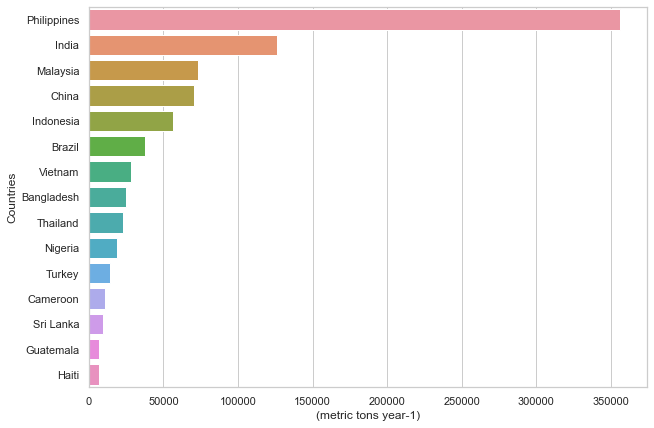

In [37]:
# Sorting 
df_Country07.sort_values(by=['Mismanaged waste emitted to the ocean (metric tons year-1)'], 
                         inplace=True, ascending=False)
df_Country07_top_n = df_Country07.head(n=15)

# Country 07 - Plot: Bar chart
plt.figure(figsize=(10, 7))
ax= sns.barplot(data=df_Country07_top_n, x="Mismanaged waste emitted to the ocean (metric tons year-1)",
                 y="Country name")
ax.set(xlabel="(metric tons year-1)", ylabel="Countries")

__Country 07: Plastic waste emitted to the ocean, 2019__
<br>

__----------------------------------------------__

In [38]:
# Exporting cleaned datafile in .csv format
# df_Country01.to_csv("plastic-waste-per-capita_Edited.csv")
# df_Country02.to_csv("plastic-waste-mismanaged_Edited.csv")
# df_Country03.to_csv("inadequately-managed-plastic.csv")
# df_Country04.to_csv("mismanaged-waste-global-total_Edited.csv")
# df_Country05.to_csv("mismanaged-plastic-waste-per-capita_Editedcsv")
# df_Country06.to_csv("plastic-exports-to-china_Edited.csv")
# df_Country07.to_csv("plastic-waste-emitted-to-the-ocean_Edited.csv")